#### Домашняя работа №4 "Валидация моделей классификации"
##### Работу выполнила студентка группы Т12О-101М-20 

##### Трусова В. Л.

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree  import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

from mpl_toolkits.mplot3d import Axes3D

In [34]:
%matplotlib inline
np.set_printoptions(precision=4)

df_source = pd.read_csv(
    'data/client_segmentation.csv', 
    dtype={'call_diff': np.float32,
           'call_diff': np.float32,
           'traffic_diff': np.float32,
           'customes_class': np.uint16}
)

df_source[(df_source.customes_class==2) & (df_source.call_diff>1.1)] = 0
df_source[(df_source.customes_class==2) & (df_source.call_diff<=1.1)] = 1

X = df_source[['call_diff','sms_diff','traffic_diff']].values
y = df_source.customes_class.values

df_source.head(5)

,call_diff,sms_diff,traffic_diff,customes_class
0,-0.666421,0.444911,-0.273538,0
1,1.000000,1.000000,1.000000,1
2,-0.841503,0.846665,0.727606,0
3,1.389749,0.390911,1.789246,1
4,1.000000,1.000000,1.000000,1


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Найдите лучший классификатор по метрике f1-score

In [78]:
print('f1 score for different classificators:\n')

for f in [RandomForestClassifier(),
          LogisticRegression(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          GaussianNB()]:
    f.fit(X_train, y_train)
    y_pred = f.predict(X_test)
    print(f'{f}:\t{f1_score(y_test, y_pred)}')


f1 score for different classificators:

RandomForestClassifier():	0.9583333333333334
LogisticRegression():	0.9583333333333334
DecisionTreeClassifier():	0.9583333333333334
KNeighborsClassifier():	0.9583333333333334
GaussianNB():	0.9166666666666666


#### Вывод

Идеальная метрика f1_score = 1. Классификаторы: RandomForestClassifier, LogisticRegression, DecisionTreeClassifier, KNeighborsClassifier по f1 score показали одинаково близкий к 1 результат (0.9583), GaussianNB по f1 score показал результат хуже (0.9166).

## Валидация моделей линейной регрессии

Пользуясь методом .score подберите наилучшее значение степени полинома

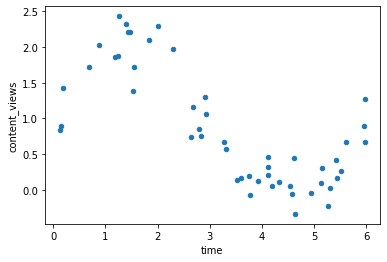

In [82]:
%matplotlib inline

df = pd.read_csv('data/content_views_toy_set.csv', encoding='utf8')
df.plot.scatter(x='time', y='content_views')
plt.show()

X = df['time'].values
y = df['content_views'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
reg = LinearRegression().fit(X_train.reshape(-1, 1), y_train)

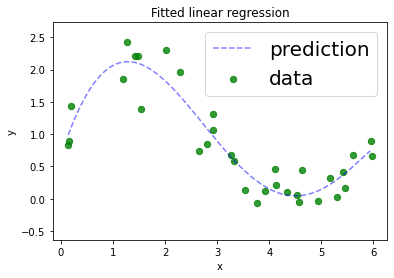

In [161]:
def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T

X_train_5 = generate_degrees(X_train, 5)
X_test_5 = generate_degrees(X_test, 5)
reg_5 = LinearRegression().fit(X_train_5, y_train)

# строим график
margin = 0.3
support = np.arange(X.min(), X.max(), step=0.1)

X_test_support = generate_degrees(support, 5)
y_hat = reg_5.predict(X_test_support)

plt.plot(support, y_hat, 'b--', alpha=0.5, label='prediction')
plt.scatter(X_train, y_train, 40, 'g', 'o', alpha=0.8, label='data')
plt.xlim(X.min() - margin, X.max() + margin)
plt.ylim(y.min() - margin, y.max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted linear regression')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

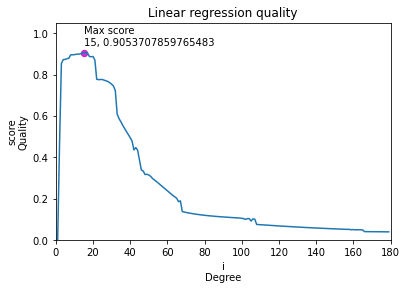

In [158]:
score_lr = [0,0]

for i in range(2,180):
    X_train_i = generate_degrees(X_train, i)
    X_test_i = generate_degrees(X_test, i)
    reg_i = LinearRegression().fit(X_train_i, y_train)
    score_i = reg_i.score(X_train_i, y_train)
    score_lr.insert(i, score_i)

# график 
max_score = max(score_lr)
max_score_i = score_lr.index(max_score)
max_i = score_lr[max_score_i]
plt.plot(score_lr)
plt.axis([0, 180, 0, 1.05])
plt.title('Linear regression quality')
plt.scatter(max_score_i, max_score, 40, 'm', 'o', alpha=0.8, label='max score')
plt.xlabel('i\nDegree')
plt.ylabel('score\nQuality')
plt.annotate(f'Max score\n{max_score_i}, {max_score}',
             xy=(max_score_i, max_score), xytext=(15, 0.94))
plt.show()